<a href="https://colab.research.google.com/github/ikramhamdi/-test_demo/blob/master/Group11_Aizat_Ikram_Amirul_Capstone2_property_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 2 : AI-Powered Real Estate Price Prediction and Market Insights

How our team use supervised machine learning algorithm to delivers **actionable insights** for investors, agents, and **property developers**, ensuring measurable ROI in future real estate development project. and data aligns with **real-world** business value.

news : https://shorturl.at/FhPhn

Team Member :
1. Muhammad Amirul Bin Md Rasid
2. Wan Mohd Ikram Hamdi Bin Wan Mahadi
3. Aizat Zulhaziq Bin Zulazli



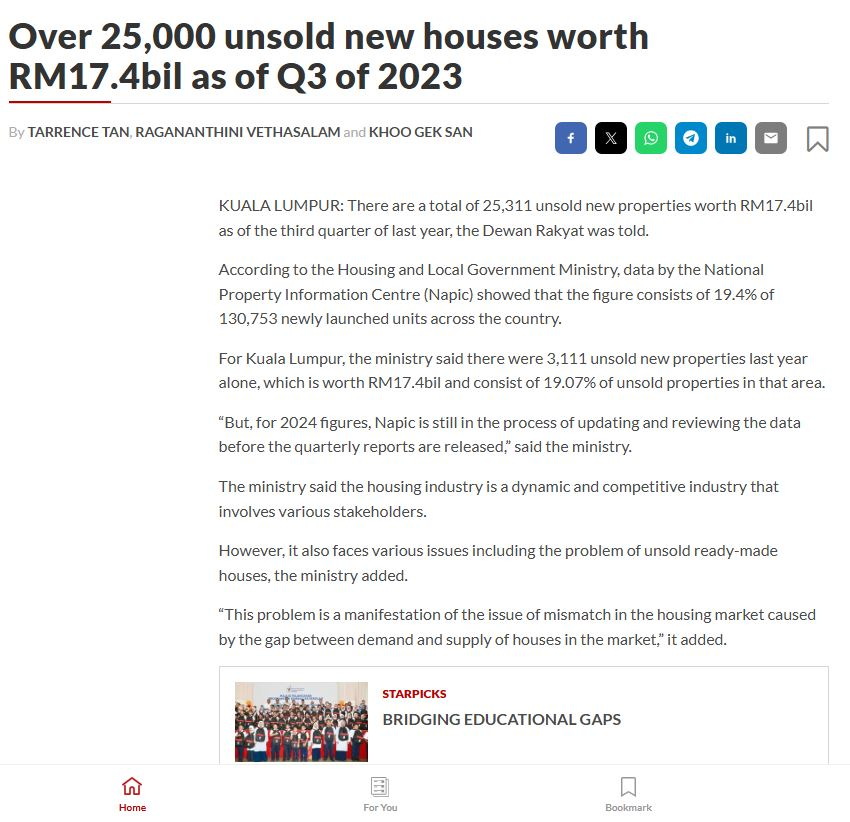

# Methodology
1. Data Collection: Gather historical property listings and market data.
https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur

2. Data Cleaning & Preprocessing: Handle missing values and prepare features for analysis.

3. Exploratory Data Analysis (EDA): Visualize price trends, feature correlations, and market insights.

4. Model Building and Train machine learning models for price prediction and evaluate model performance using metrics like RMSE and R-squared.

*   i. Linear Regression
*   ii. Random Forest

5. Visualization & Reporting: Provide interactive dashboards and visualizations for insights.

# 1. Dataset upload

In [ ]:
# necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving KL_data_kaggle.csv to KL_data_kaggle.csv


In [ ]:
# Load the uploaded file into a DataFrame
data = pd.read_csv(next(iter(uploaded)))
data


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


# 2. Data Cleaning and Preparation

In [ ]:
# Ensure 'Price' column is string type, then clean it
if data['Price'].dtype != 'object':
    data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace('RM', '', regex=False).str.replace(',', '', regex=False).astype(float, errors='ignore')

data.head(100)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
95,"KLCC, Kuala Lumpur",2300000.0,1,1.0,2.0,Serviced Residence (Intermediate),"Built-up : 1,046 sq. ft.",Partly Furnished
96,"Taman Tun Dr Ismail, Kuala Lumpur",4995000.0,5+1,7.0,6.0,Bungalow,Land area : 8113 sq. ft.,Partly Furnished
97,"Taman Tun Dr Ismail, Kuala Lumpur",1630000.0,4,3.0,2.0,2-sty Terrace/Link House (Intermediate),Land area : 22x80 sq. ft.,Partly Furnished
98,"Mont Kiara, Kuala Lumpur",1850000.0,4+1,4.0,2.0,Condominium,"Built-up : 1,830 sq. ft.",Partly Furnished


In [ ]:
# Ensure 'Size' column is string type, then extract numerical part
if data['Size'].dtype != 'object':
    data['Size'] = data['Size'].astype(str)
data['Size'] = data['Size'].str.extract(r'(\d[\d,]*)')[0].str.replace(',', '', regex=False).astype(float, errors='ignore')
data.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improved cleaning for 'Rooms' column
def clean_rooms(value):
    if isinstance(value, str):
        value = value.lower()
        if 'studio' in value:  # Convert 'studio' to 1
            return 1
        try:
            # Add components together, e.g., '2+1' -> 3
            return sum(int(num) for num in value.replace('+', ' ').split())
        except ValueError:
            return None
    return pd.to_numeric(value, errors='coerce')

# Apply cleaning function and handle missing values
data['Rooms'] = data['Rooms'].apply(clean_rooms)
data['Rooms'].fillna(data['Rooms'].median(), inplace=True)

data.head(100)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3.0,3.0,2.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6.0,7.0,NaN,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3.0,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,4.0,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,5.0,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished
...,...,...,...,...,...,...,...,...
95,"KLCC, Kuala Lumpur",2300000.0,1.0,1.0,2.0,Serviced Residence (Intermediate),1046.0,Partly Furnished
96,"Taman Tun Dr Ismail, Kuala Lumpur",4995000.0,6.0,7.0,6.0,Bungalow,8113.0,Partly Furnished
97,"Taman Tun Dr Ismail, Kuala Lumpur",1630000.0,4.0,3.0,2.0,2-sty Terrace/Link House (Intermediate),22.0,Partly Furnished
98,"Mont Kiara, Kuala Lumpur",1850000.0,5.0,4.0,2.0,Condominium,1830.0,Partly Furnished


# (Technical person : Amirul)

In [ ]:
# Improved cleaning for 'Rooms' column
def clean_rooms(value):
    if isinstance(value, str):
        value = value.lower()
        if 'studio' in value:  # Convert 'studio' to 1
            return 1
        try:
            # Add components together, e.g., '2+1' -> 3
            return sum(int(num) for num in value.replace('+', ' ').split())
        except ValueError:
            return None
    return pd.to_numeric(value, errors='coerce')

# Apply cleaning function and handle missing values
data['Rooms'] = data['Rooms'].apply(clean_rooms)
data['Rooms'].fillna(data['Rooms'].median(), inplace=True)
data.head()


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3.0,3.0,2.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6.0,7.0,NaN,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3.0,4.0,2.0,Condominium (Corner),1875.0,Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,4.0,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,5.0,3.0,2.0,Condominium (Corner),1513.0,Partly Furnished


In [ ]:
# Filter out extreme price outliers
lower_limit = data['Price'].quantile(0.01)
upper_limit = data['Price'].quantile(0.99)
filtered_data = data[(data['Price'] >= lower_limit) & (data['Price'] <= upper_limit)].copy()
#filtered_data.isna().sum

In [ ]:
# Prepare data for modeling
features = ['Rooms', 'Bathrooms', 'Car Parks', 'Size']
target = 'Price'

X = filtered_data[features]
y = filtered_data[target]

# Handle missing values in features
X.fillna(X.median(), inplace=True)

print(X)

       Rooms  Bathrooms  Car Parks     Size
0        3.0        3.0        2.0   1335.0
1        6.0        7.0        2.0   6900.0
2        3.0        4.0        2.0   1875.0
4        5.0        3.0        2.0   1513.0
5        6.0        5.0        4.0   7200.0
...      ...        ...        ...      ...
53878    6.0        4.0        2.0   7168.0
53879    5.0        4.0        2.0  15000.0
53880    6.0        4.0        2.0   7168.0
53881    3.0        2.0        2.0   1150.0
53882    4.0        2.0        3.0   1313.0

[52564 rows x 4 columns]


# 3. Exploratory Data Analysis: Visualize price trends, feature correlations, and market insights.

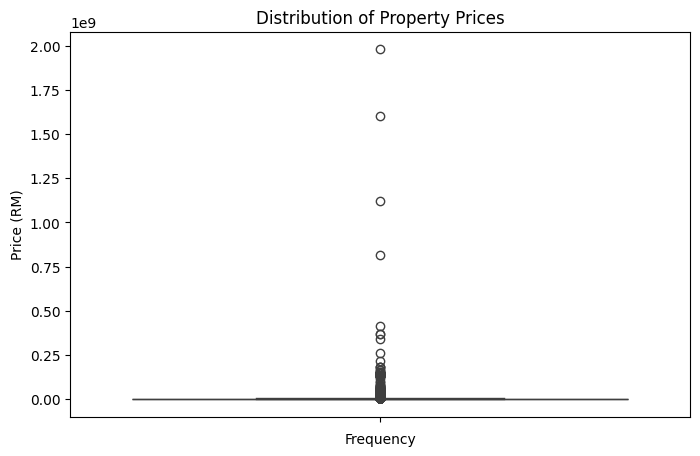

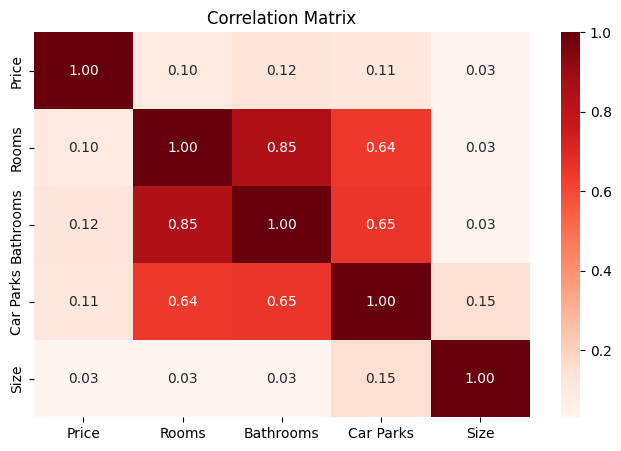

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Price Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data['Price'])
plt.title('Distribution of Property Prices')
plt.xlabel('Frequency')
plt.ylabel('Price (RM)')
plt.show()

# Correlation Matrix
correlation_matrix = data[['Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Size']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="Reds", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Return cleaned summary
#data.describe()


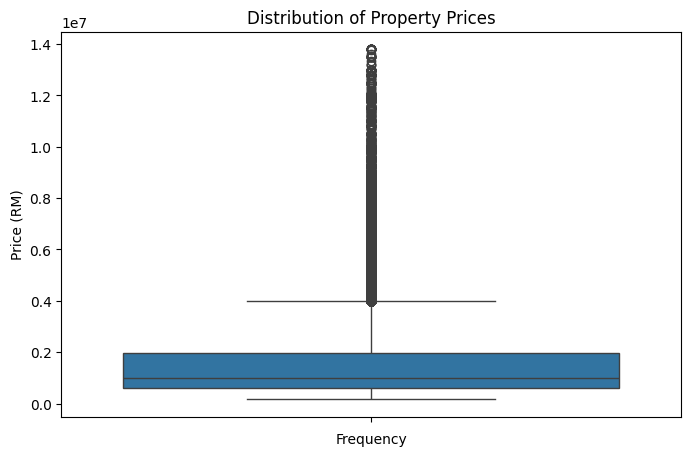

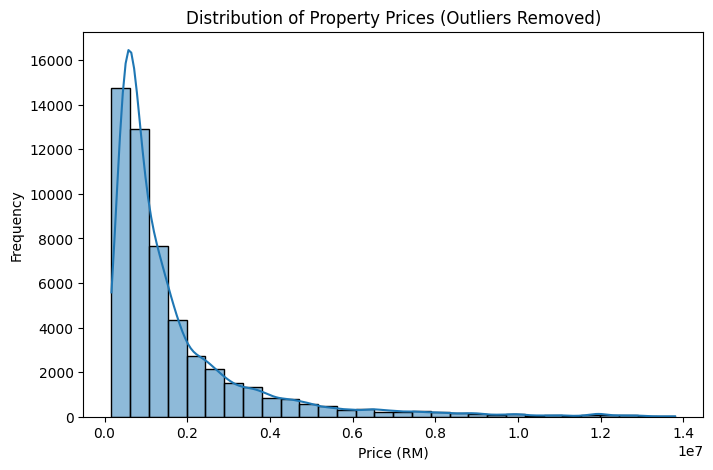

In [ ]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(filtered_data['Price'])
plt.title('Distribution of Property Prices')
plt.xlabel('Frequency')
plt.ylabel('Price (RM)')
plt.show()

# Re-plot Price Distribution after removing outliers
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['Price'], kde=True, bins=30)
plt.title('Distribution of Property Prices (Outliers Removed)')
plt.xlabel('Price (RM)')
plt.ylabel('Frequency')
plt.show()
#data.describe()


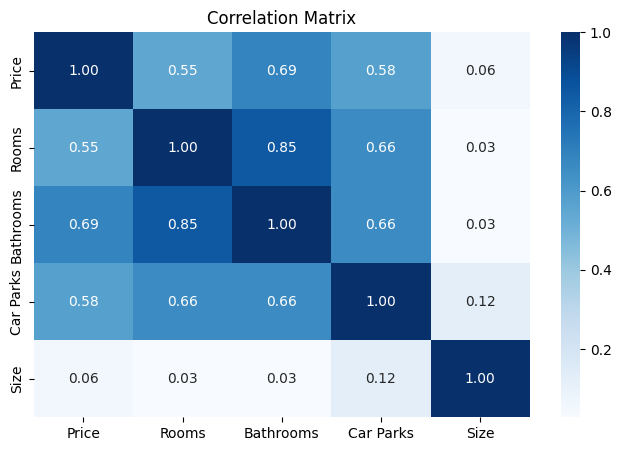

In [ ]:
# Correlation Matrix
correlation_matrix3 = filtered_data[['Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Size']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix3, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Updated Insights:
Price Distribution:

After removing the top 1% of outliers, the price distribution is still right-skewed but more realistic.
Most prices fall below RM 2 million.

# (Technical person : Ikram)

# Using Linear Regression to predict price based on features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([2478789.16897142,  939354.35795052,  787709.9125823 , ...,
       1708214.68381179, 1024909.28686145, 3227505.58587628])

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("===============================================")
print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("===============================================")

Linear Regression Metrics:
Mean Absolute Error (MAE): 898545.0637842201
Mean Squared Error (MSE): 2123482206182.229
R-squared (R2): 0.4113463196585807


# The R² score is relatively low, suggesting that Rooms, Bathrooms, Car Parks, and Size alone may not fully explain price variability.

Additional features like location, furnishing, and property type might improve accuracy.


# Test to use Random Forest to see if got better accuracy

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=2000,  # Number of trees
    max_depth=None,    # Let the tree grow fully
    random_state=42,   # Ensure reproducibility
)
# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=2000, random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred

array([2823166.36702742,  436158.69320541,  428648.37788156, ...,
        856687.25292631,  556561.26040481, 3769017.24      ])

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("===============================================")
print("Random Forest Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("===============================================")

Random Forest Metrics:
Mean Absolute Error (MAE): 411375.06443758874
Mean Squared Error (MSE): 739571600226.6704
Root Mean Squared Error (RMSE): 859983.4883453696
R-squared (R2): 0.794982249871482


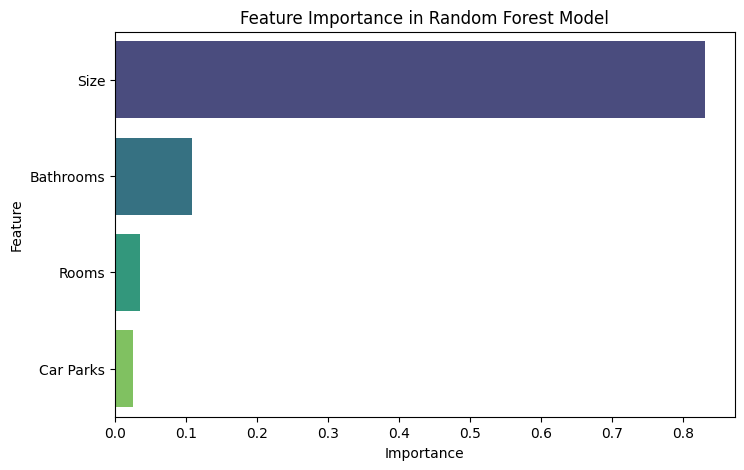

In [ ]:
# Extract feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Future Analysis
If the dataset included a time factor, it would enable richer analyses such as market forecasting, trend identification, and dynamic feature evaluation. This would not only improve the model’s predictive accuracy but also provide deeper insights into the real estate market for strategic decision-making.

#Conclusion
By integrating AI-powered property price prediction and market insights, this project offers substantial value to real estate investors, agents, and developers. With data-driven decision-making, stakeholders can unlock opportunities, optimize investments, and gain a strategic advantage in the real estate market.